In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
style.use('ggplot')

# Clustering Analysis 
## How Different Metrics Affect Clustering Results

### What are clusters of points? Example with real-world data
Clusters is a collection of data-objects which are:
    1. Similar (or related) to one another within the same group(i.e., cluster)
    2. Dissimilar (or unrelated) to the objects in other groups(i.e., clusters)
Example of nine students and their poins from exams of math and physics
```
```
| Student | Math | Physics |
|---------|------|---------|
| A       | 10   | 15      |
| B       | 13   | 12      |
| C       | 22   | 23      |
| D       | 43   | 45      |
| E       | 50   | 53      |
| F       | 51   | 56      |
| G       | 80   | 88      |
| H       | 95   | 91      |
| I       | 90   | 99      |
```
```

### What is cluster analisis
* It is a given set of data points, partition them into a set of groups(i.e., clusters) which are as similar as possible.
* It is unsupervised learning(i.e., no predefined classes)
    * This contrasts with classification(i.e., supervised learning)
* Typical ways to use/apply cluster analysis
    * As a stand-alone tool to get insight into data distribution
    * As a preprocessing(or intemedeate) step for other algorithms

First three students(A, B, C) forming a cluster, because the points from their exams are between 10 and 23, so they are similar. Same is with the second cluster(D, E, F), their points are between 43 and 56 and third cluster is(G, H, I).

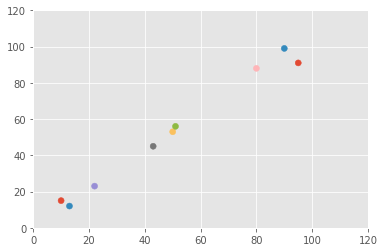

In [4]:
mathResults = [10, 13, 22, 43, 50, 51, 80, 95, 90] # students math points
physicsResults = [15, 12, 23, 45, 53, 56, 88, 91, 99] # students physics points
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'] #colors for each student

plt.scatter(mathResults, physicsResults, color=colors)

plt.axis([0, 120, 0, 120])
plt.show()

First 3 points(blue, orange, green) from left to right forming a cluster, because the points from exams of first three studens are similar. Same is with the second cluster(red, brown, purple) and third(ping, grey, darkyellow)

### What is k-means clustering?
K Means Clustering is one of the most popular Machine Learning algorithms for cluster analysis in data mining. K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

K Means algorithm is an unsupervised learning algorithm, ie. it needs no training data, it performs the computation on the actual dataset. This should be apparent from the fact that in K Means, we are just trying to group similar data points into clusters, there is no prediction involved.

### How it works?
The k-means algorithm takes a dataset of ‘n’ points as input, together with an integer parameter ‘k’ specifying how many clusters to create(supplied by the programmer). The output is a set of ‘k’ cluster centroids and a labeling of the dataset that maps each of the data points to a unique cluster.

$$ \sum_{k=1}^K\sum_{x_n\in C_k}\parallel x_n - \mu_k \parallel^2$$

### How does k-means depend on the initialization?


### How can we reduce the dependency on the initialization?

### What is agglomerative clustering (hierarchical clustering)?
Agglomerative hierarchical clustering is a bottom-up clustering method where clusters have sub-clusters, which in turn have sub-clusters, etc. The classic example of this is species taxonomy. Gene expression data might also exhibit this hierarchical quality (e.g. neurotransmitter gene families). Agglomerative hierarchical clustering starts with every single object (gene or sample) in a single cluster. Then, in each successive iteration, it agglomerates (merges) the closest pair of clusters by satisfying some similarity criteria, until all of the data is in one cluster.

#### Process
* Assign each object to a separate cluster.
* Evaluate all pair-wise distances between clusters (distance metrics are described in Distance Metrics Overview).
* Construct a distance matrix using the distance values.
* Look for the pair of clusters with the shortest distance.
* Remove the pair from the matrix and merge them.
* Evaluate all distances from this new cluster to all other clusters, and update the matrix.
* Repeat until the distance matrix is reduced to a single element.

#### Advantages
* It can produce an ordering of the objects, which may be informative for data display.
* Smaller clusters are generated, which may be helpful for discovery.

#### Disadvantages
* No provision can be made for a relocation of objects that may have been 'incorrectly' grouped at an early stage. The result should be examined closely to ensure it makes sense.
* Use of different distance metrics for measuring distances between clusters may generate different results. Performing multiple experiments and comparing the results is recommended to support the veracity of the original results.

### Implementation of k-means

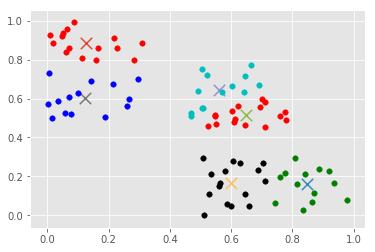

In [9]:
class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]
        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
            previous = dict(self.centroids)
            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

df = pd.read_csv(r".\data\ipl.csv")
df = df[['one', 'two']]
dataset = df.astype(float).values.tolist()

X = df.values #returns a numpy array

km = K_Means(6)
km.fit(X)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)

plt.show()

### Implementation of agglomeraive clustering

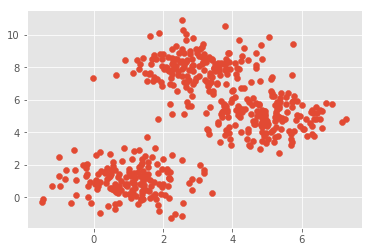

[[4.15538956 6.17511277]
 [1.04427418 1.05970501]]
Number of estimated clusters: 2


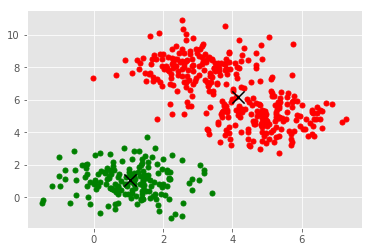

In [8]:
centers = [[1,1],[5,5],[3,8]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)

plt.scatter(X[:,0],X[:,1])
plt.show()

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r.','g.','b.','c.','k.','y.','m.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

[[5.03277638 4.92620422]
 [0.98764961 0.90055951]
 [2.99518227 9.93163604]]
Number of estimated clusters: 3


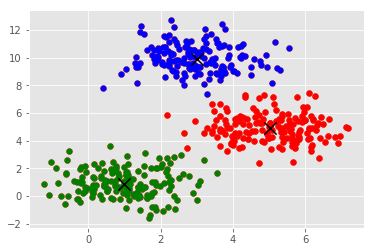

In [10]:
centers = [[1,1],[5,5],[3,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)

plt.scatter(X[:,0],X[:,1])

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r.','g.','b.','c.','k.','y.','m.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

### Agglomerative clustering with different metrics
Demonstrates the effect of different metrics on the hierarchical clustering.

The example is engineered to show the effect of the choice of different metrics. It is applied to waveforms, which can be seen as high-dimensional vector. Indeed, the difference between metrics is usually more pronounced in high dimension (in particular for euclidean and cityblock).

We generate data from three groups of waveforms. Two of the waveforms (waveform 1 and waveform 2) are proportional one to the other. The cosine distance is invariant to a scaling of the data, as a result, it cannot distinguish these two waveforms. Thus even with no noise, clustering using this distance will not separate out waveform 1 and 2.

We add observation noise to these waveforms. We generate very sparse noise: only 6% of the time points contain noise. As a result, the l1 norm of this noise (ie “cityblock” distance) is much smaller than it’s l2 norm (“euclidean” distance). This can be seen on the inter-class distance matrices: the values on the diagonal, that characterize the spread of the class, are much bigger for the Euclidean distance than for the cityblock distance.

When we apply clustering to the data, we find that the clustering reflects what was in the distance matrices. Indeed, for the Euclidean distance, the classes are ill-separated because of the noise, and thus the clustering does not separate the waveforms. For the cityblock distance, the separation is good and the waveform classes are recovered. Finally, the cosine distance does not separate at all waveform 1 and 2, thus the clustering puts them in the same cluster.

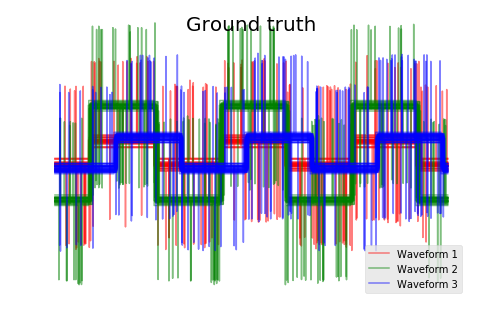

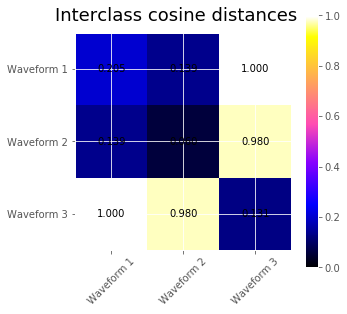

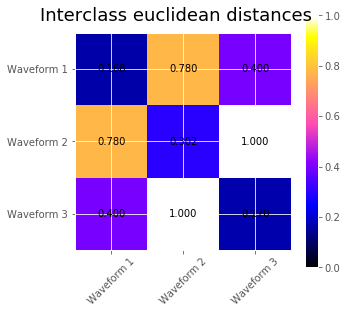

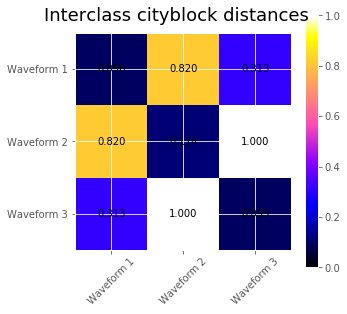

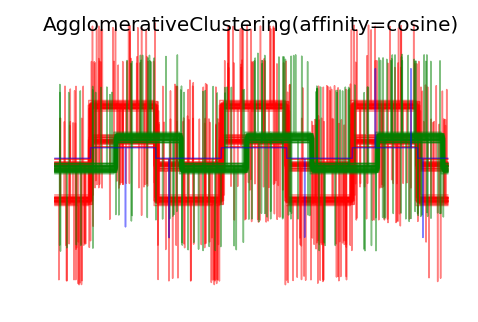

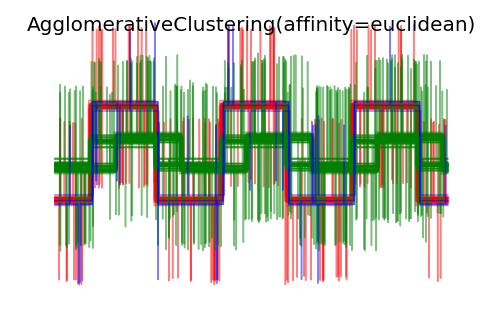

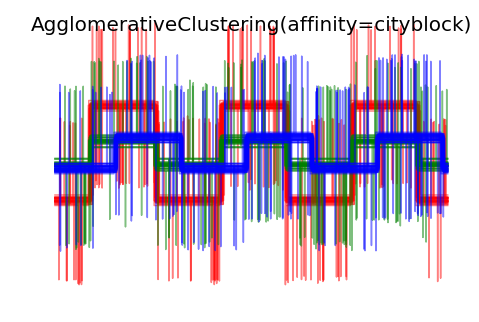

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))

X = list()
y = list()
for i, (phi, a) in enumerate([(.5, .15), (.5, .6), (.3, .2)]):
    for _ in range(30):
        phase_noise = .01 * np.random.normal()
        amplitude_noise = .04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < .997] = 0

        X.append(12 * ((a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise))) + additional_noise))
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ('Waveform 1', 'Waveform 2', 'Waveform 3')

# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c, n in zip(range(n_clusters), 'rgb', labels):
    lines = plt.plot(X[y == l].T, c=c, alpha=.5)
    lines[0].set_label(n)

plt.legend(loc='best')

plt.axis('tight')
plt.axis('off')
plt.suptitle("Ground truth", size=20)


# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j], metric=metric).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

    plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18)
    plt.tight_layout()
    
# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage="average", affinity=metric)
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=.5)
        
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)

plt.show()

### Resorces
* [Hierarchical Clustering](https://pythonprogramming.net/hierarchical-clustering-machine-learning-python-scikit-learn/)
* [K Means Clustering](http://madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustering-from-scratch-in-python.html)
* [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
* [Agglomerative clustering with different metrics](http://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#agglomerative-clustering-with-different-metrics)
* [Wikipedia](https://en.wikipedia.org)
* [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)